In [46]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

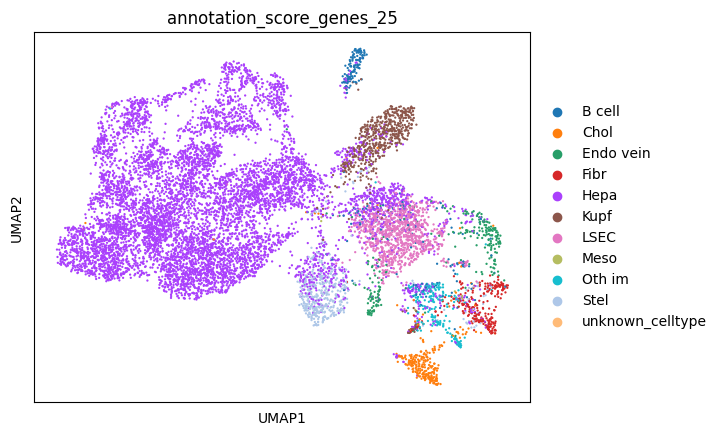

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             2.235483
Chol                               2.431421
Endo vein                          2.253295
Fibr                               2.190951
Hepa                              70.876380
Kupf                               5.343783
LSEC                               9.120057
Meso                               0.062344
Oth im                             1.710011
Stel                               3.767367
unknown_celltype                   0.008906


In [4]:
# Original score_genes with HL marker gene list with other immune cells
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

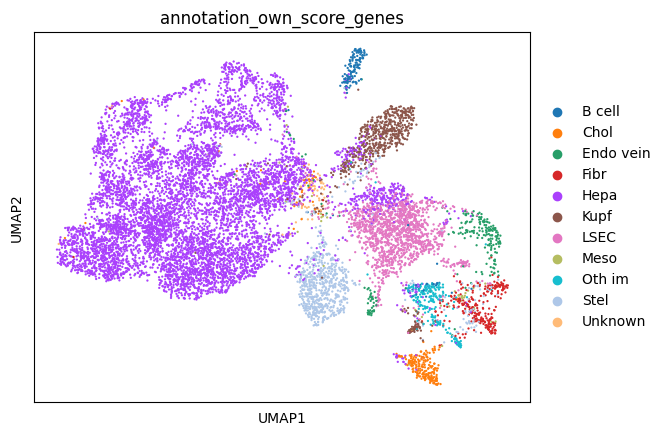

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       1.531885
Chol                         2.280014
Endo vein                    2.021731
Fibr                         2.440328
Hepa                        64.205558
Kupf                         5.664410
LSEC                        12.602423
Meso                         0.400784
Oth im                       1.950481
Stel                         6.296758
Unknown                      0.605629


Hepa      LSEC  Endo vein      Chol      Kupf      Stel      Fibr  \
0      0.518377  0.006058   0.030701  0.085765  0.021587       NaN  0.034497   
1           NaN  0.077458   0.003792       NaN  0.373149       NaN  0.231369   
2           NaN       NaN   0.001595       NaN  0.023841       NaN  0.232491   
3      0.195218       NaN        NaN  0.036456       NaN       NaN  0.122768   
4      0.248247       NaN        NaN  0.069145       NaN  0.052458  0.032160   
...         ...       ...        ...       ...       ...       ...       ...   
11223  0.322433       NaN        NaN  0.059235       NaN  0.054651  0.029201   
11224  0.516080       NaN        NaN  0.081015  0.065312  0.067269  0.041674   
11225  0.348373  0.007146        NaN  0.058203  0.049473       NaN       NaN   
11226       NaN  0.072516        NaN       NaN  0.062516  0.628982  0.337339   
11227  0.305568  0.292362   0.081682  0.058369  0.635198  0.117443  0.071625   

         B cell      Meso    Oth im  
0           NaN       NaN  0.038485  
1           NaN  0.492883       NaN  
2           NaN  0.672062       NaN  
3           NaN  0.214938       NaN  
4           NaN       NaN       NaN  
...         ...       ...       ...  
11223       NaN       NaN       NaN  
11224       NaN       NaN       NaN  
11225       NaN       NaN       NaN  
11226       NaN       NaN       NaN  
11227  0.011332  0.008365  0.032582  

[11228 rows x 10 columns]

In [5]:
# Own score genes with HL marker gene list with other immune cells
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm.csv"
scores = own_score_genes(sdata,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

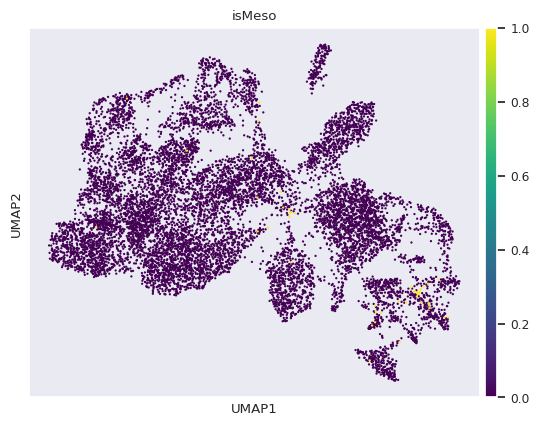

In [42]:
sdata.table.obs['isMeso'] = sdata.table.obs['annotation_own_score_genes'] == 'Meso'
sdata.table.obs['isMeso'] = sdata.table.obs['isMeso'].astype(int)
sc.pl.umap(sdata.table,color=['isMeso'],color_map='viridis')
# drop isMeso column    
# sdata.table.obs.drop(columns=['isMeso'],inplace=True)

In [ ]:
sc.pl.umap(sdata.table,color=['score_celltype_own_score_genes'])

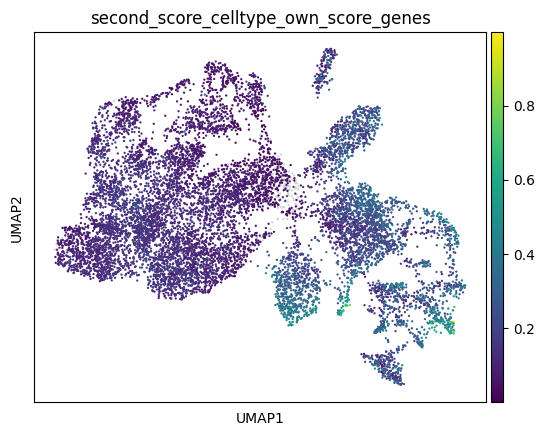

In [7]:
sc.pl.umap(sdata.table,color=['second_score_celltype_own_score_genes'])

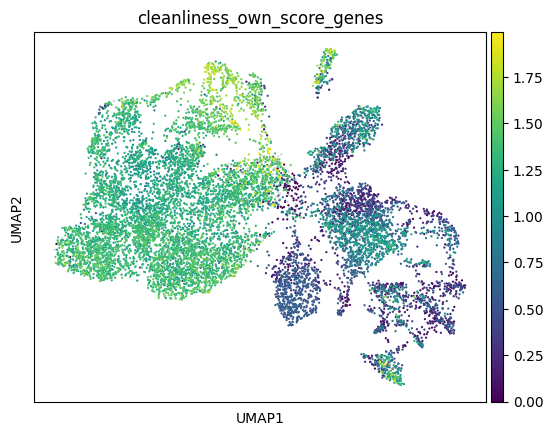

In [8]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes'])

Hepa          8.669
LSEC          9.333
Endo vein     7.250
Chol          7.500
Kupf         19.500
Stel         16.001
Fibr         17.625
B cell        4.500
Meso          6.000
Oth im        4.000
dtype: float64


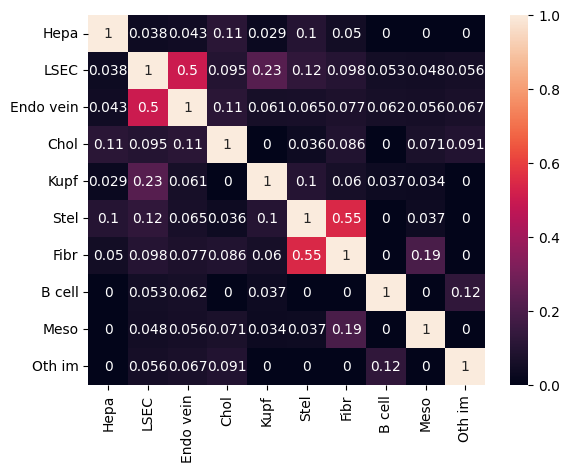

In [9]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm.csv"
Jaccard_similarity_matrix(path_mg)

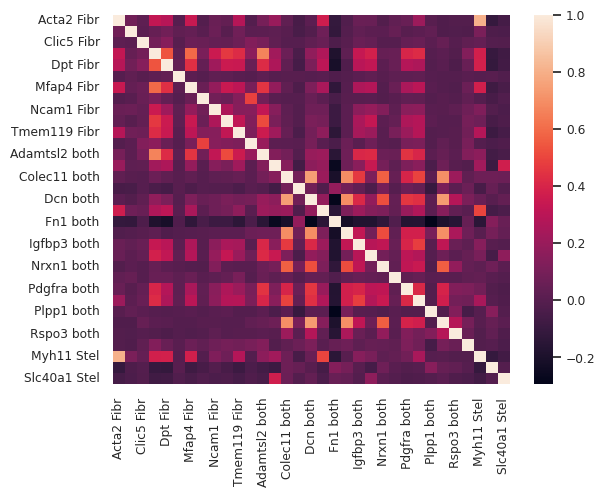

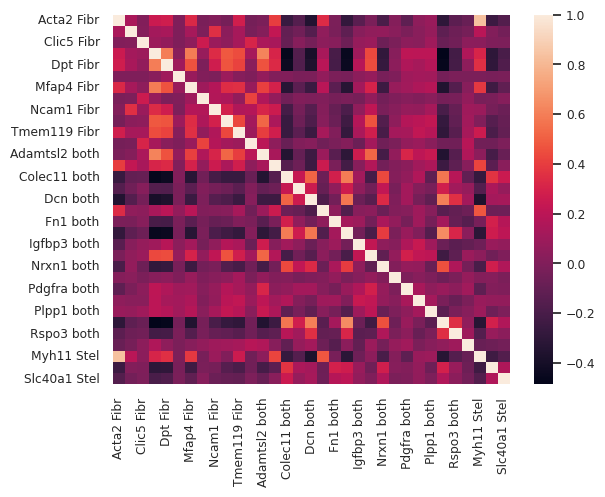

In [10]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between fibroblasts and stellate cells
# expression of all cells
sns.set(font_scale=0.8)
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'Fibr','Stel')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'Fibr') | (sdata.table.obs['annotation_own_score_genes'] == 'Stel'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'Fibr','Stel')

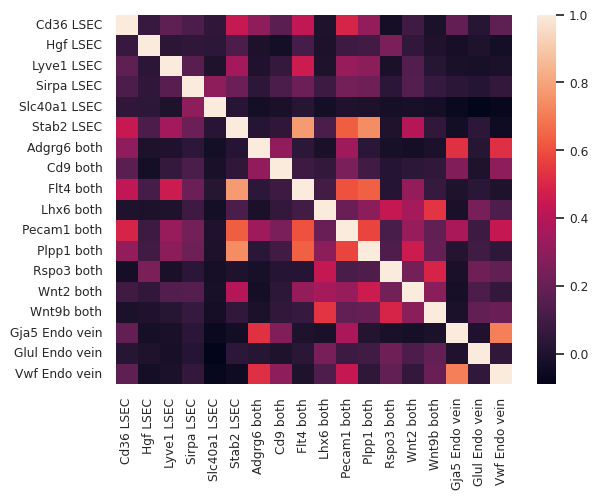

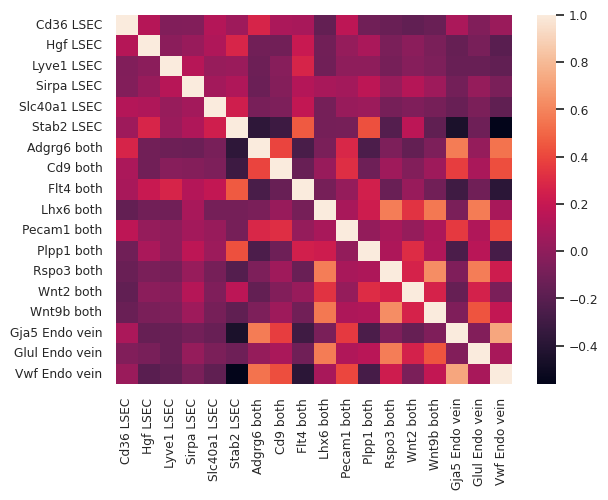

In [11]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between LSECs and Endo vein cells
# expression of all cells
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'LSEC','Endo vein')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'LSEC') | (sdata.table.obs['annotation_own_score_genes'] == 'Endo vein'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'LSEC','Endo vein')

<AxesSubplot: >

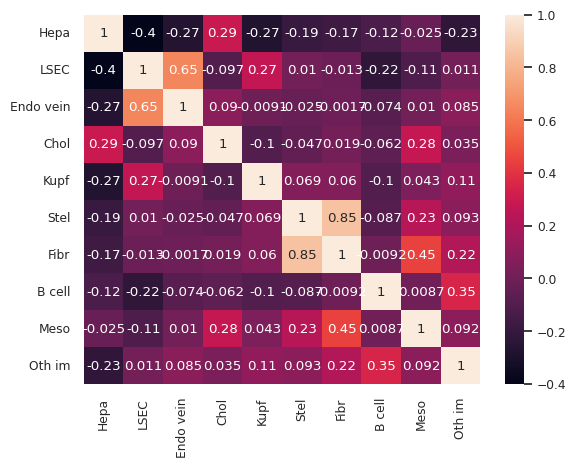

In [12]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

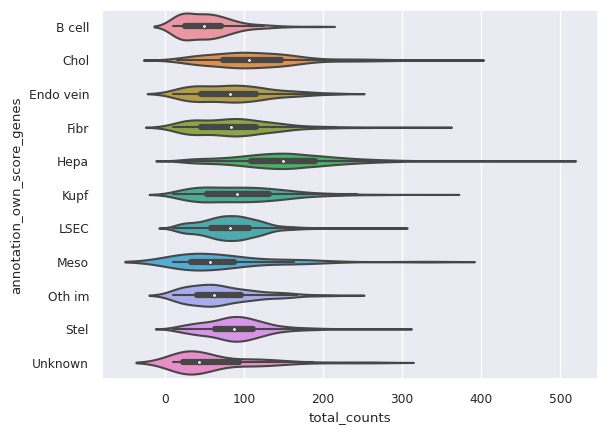

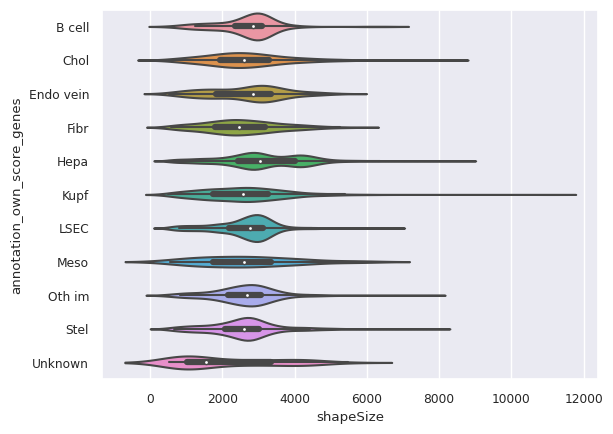

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

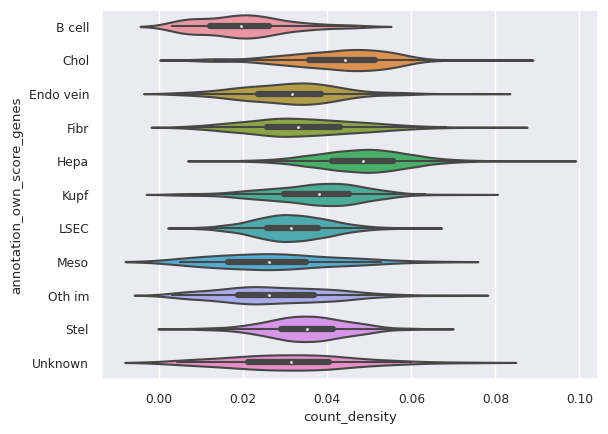

In [13]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

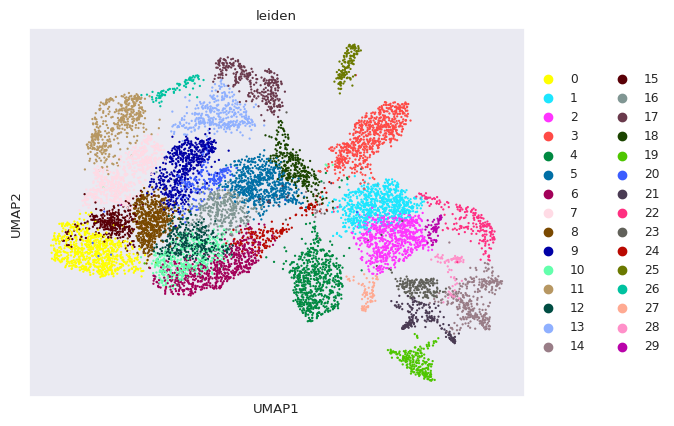

In [14]:
sc.tl.leiden(sdata.table,resolution=1.7,key_added='leiden')
sdata.table.obs
sc.pl.umap(sdata.table,color=['leiden'])

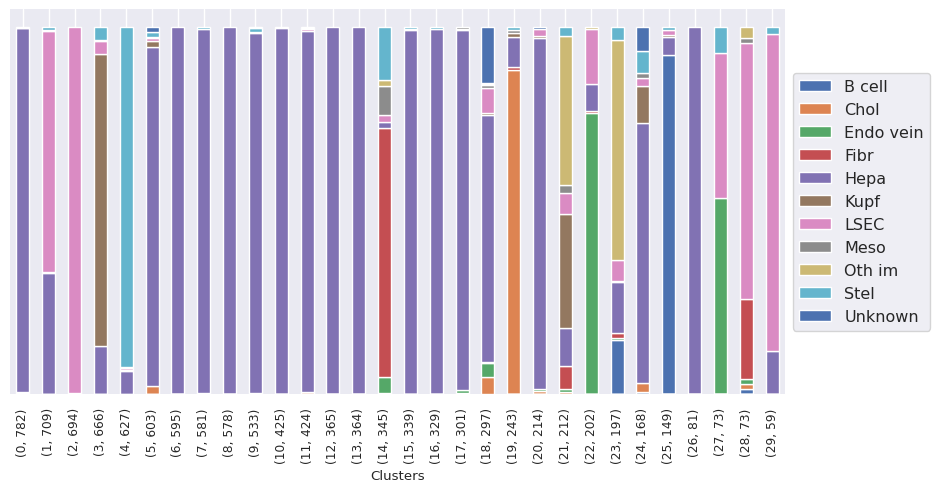

In [47]:
clusteringVSleiden(sdata.table, "annotation_own_score_genes", "leiden")

In [15]:
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell','Oth im']
leiden_clusters = [[0,5,6,7,8,9,10,11,12,13,15,16,17,18,20,24,26],[3],[1,2,29],[22,27],[14],[4],[28],[19],[25],[21,23]]
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
# cells per leiden_cell_type cluster, to see the max number of n_cells you can take per cluster (149 in this case)
print(sdata.table.obs['leiden_cell_types'].value_counts())
min_cells_per_leiden_cell_type = sdata.table.obs['leiden_cell_types'].value_counts().min()

Hepa         6979
LSEC         1462
Kupf          666
Stel          627
Oth im        409
Fibr          345
Endo vein     275
Chol          243
B cell        149
Meso           73
Name: leiden_cell_types, dtype: int64


In [37]:
sdata.table.obs['isMeso_2'] = 

cells
64         Hepa
66       Oth im
67         Fibr
68         Fibr
69         Hepa
          ...  
28929      Hepa
28944      Hepa
28992      Hepa
29115      Stel
29130      Kupf
Name: leiden, Length: 11228, dtype: category
Categories (10, object): ['Hepa', 'LSEC', 'Kupf', 'Stel', ..., 'Oth im', 'Endo vein', 'B cell', 'Meso']

Summary:
Hepa
Maybe drop:[['Glul', 'Endo vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Endo vein'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Endo vein'], ['Axl', 'Fibr'], ['Lpl', 'Fibr'], ['Plpp1', 'Meso']]
Chol
Maybe drop:[['Fn1', 'Hepa'], ['Adgrg6', 'Endo vein']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Endo vein'], ['Plpp1', 'Meso'], ['Pecam1', 'B cell']]
LSEC
Maybe drop:[['Sirpa', 'Kupf'], ['Adgrg6', 'Endo vein']]
Oth im
Maybe drop:[['Cd9', 'Endo vein'], ['Cd9', 'Chol']]
Meso
Maybe drop:[['Tmem119', 'Fibr']]
B cell
Maybe drop:[['Itgb7', 'Oth im']]
Summary:
Hepa
Maybe drop:[['Glul', 'Endo vein']]
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Cxcl12', 'Hepa'], ['Plpp1', 'Endo vein'], ['Fn1', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Plpp1', 'Endo vein'], ['Axl', 'Fibr'], ['Lpl', 'Fibr'], ['Plpp1', 'Meso']]
Chol
Maybe drop:[['Fn1', 'Hepa'], ['Adgrg6', 'Endo vein']]
Kupf
Maybe drop:[['Cd36', 'LSEC'], ['Plpp1', 'Endo vein'], ['Plpp1', 'Meso'], 

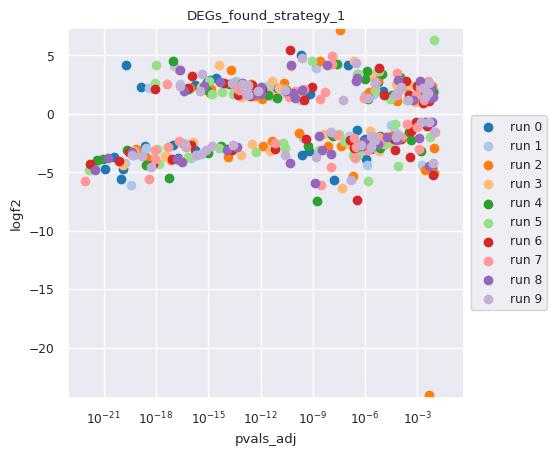

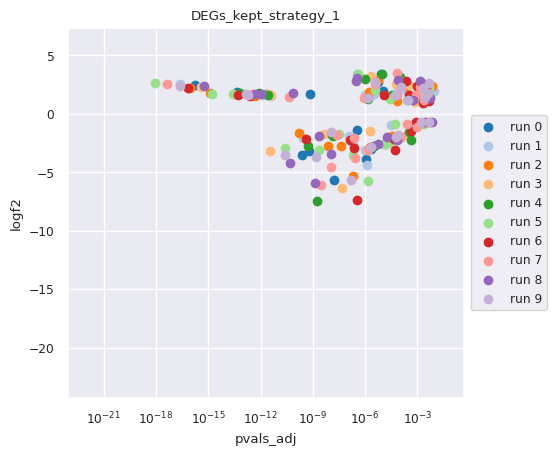

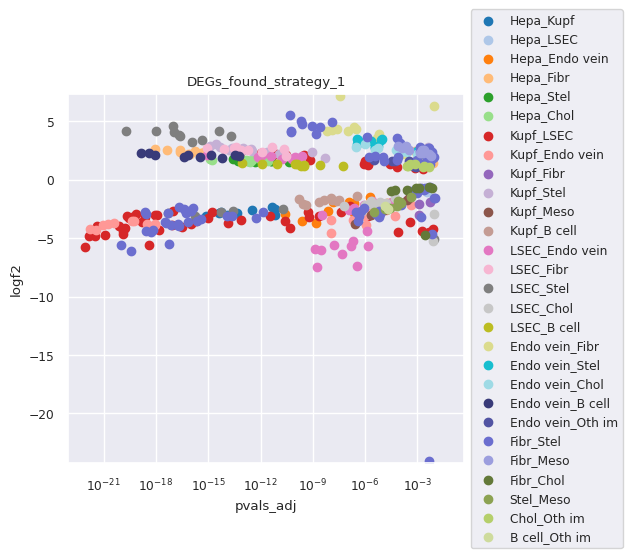

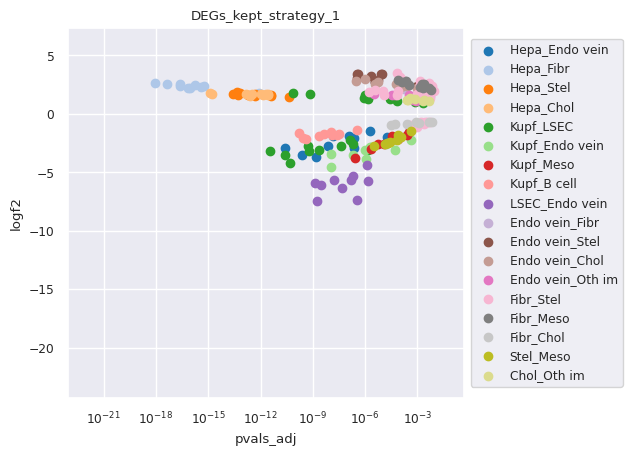

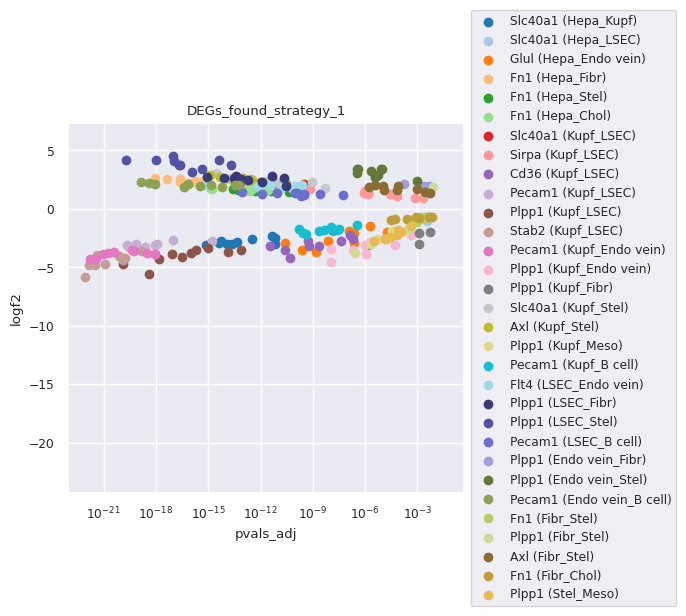

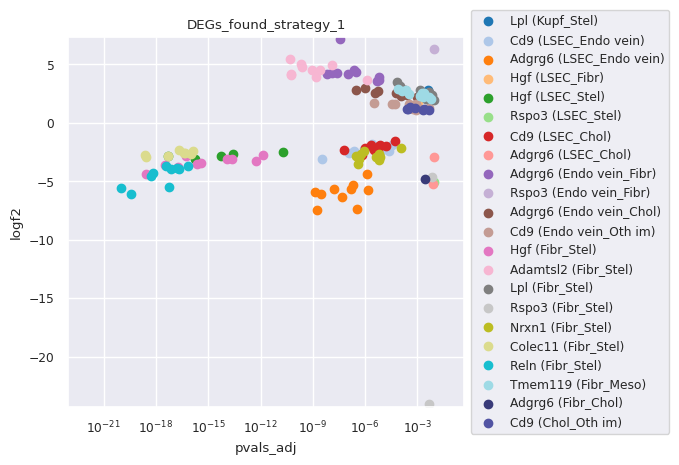

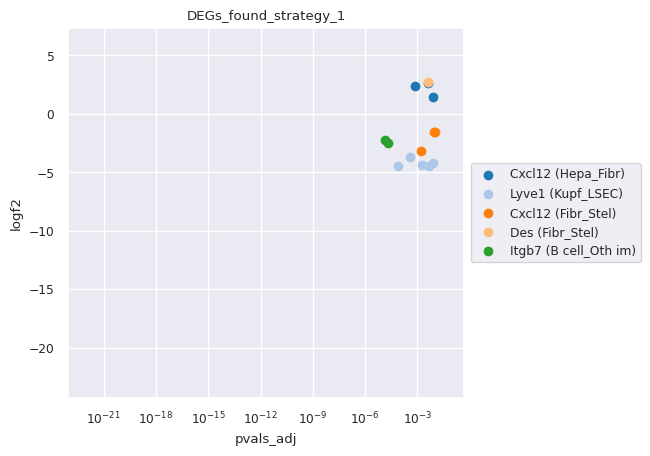

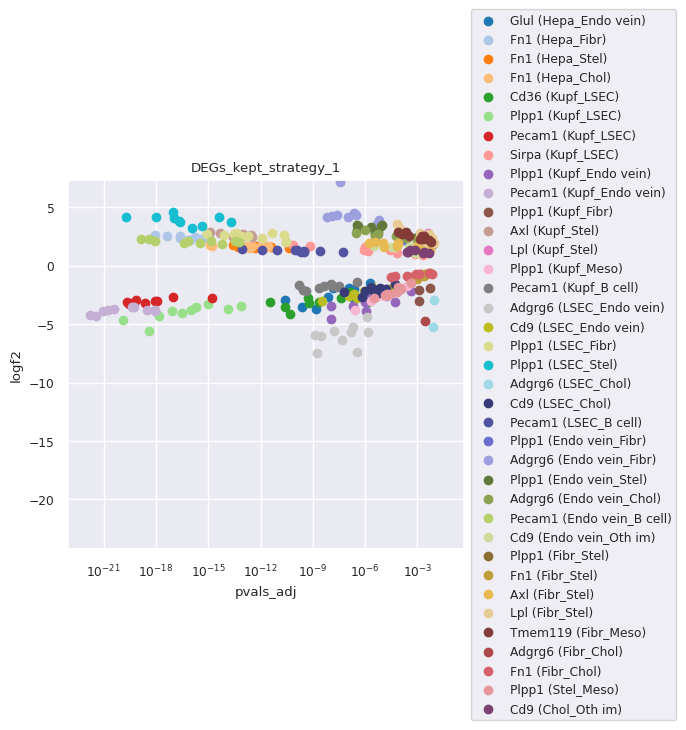

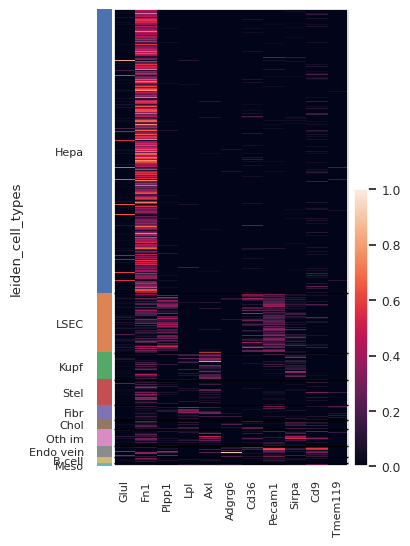

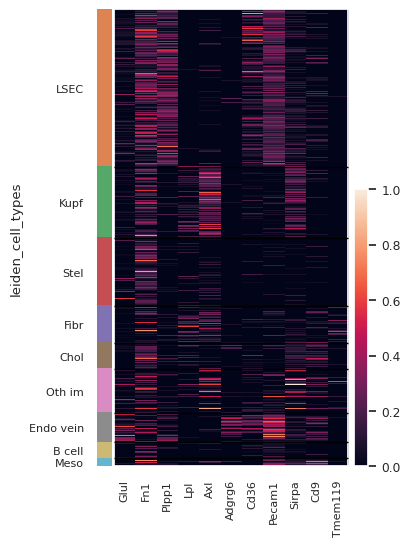

In [16]:
# STRATEGY 1 to change the marker gene list
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell','Oth im']
leiden_clusters = [[0,5,6,7,8,9,10,11,12,13,15,16,17,18,20,24,26],[3],[1,2,29],[22,27],[14],[4],[28],[19],[25],[21,23]]
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters,path_mg,10,min_cells_per_leiden_cell_type,1)

In [17]:
# Update marker gene list based on STRATEGY 1:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified1.csv")

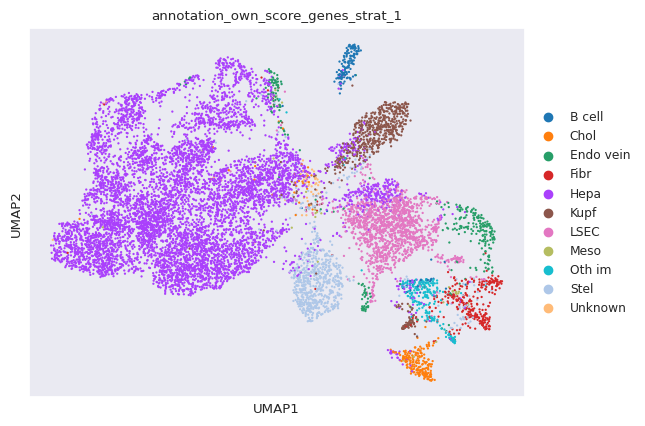

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1
B cell                               1.549697
Chol                                 2.137513
Endo vein                            2.778767
Fibr                                 2.689704
Hepa                                63.840399
Kupf                                 5.726755
LSEC                                12.433203
Meso                                 0.320627
Oth im                               1.861418
Stel                                 6.314571
Unknown                              0.347346


In [18]:
# Own score genes with modified marker gene list based on STRATREGY 1
path_mg_mod1 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified1.csv"
scores = own_score_genes(sdata,path_mg_mod1,suffix='_strat_1')
visualize_classification(sdata,'annotation_own_score_genes_strat_1','umap_23_15',path_mg_mod1,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

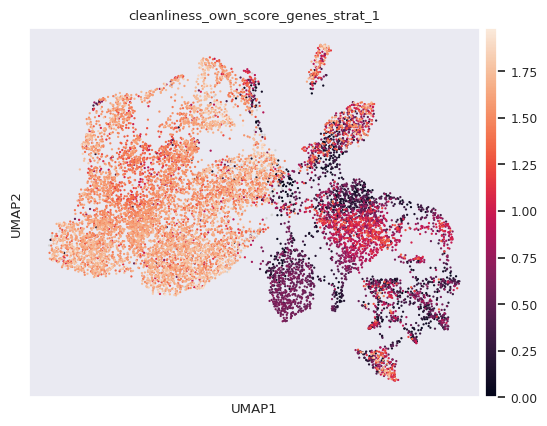

In [19]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1'])

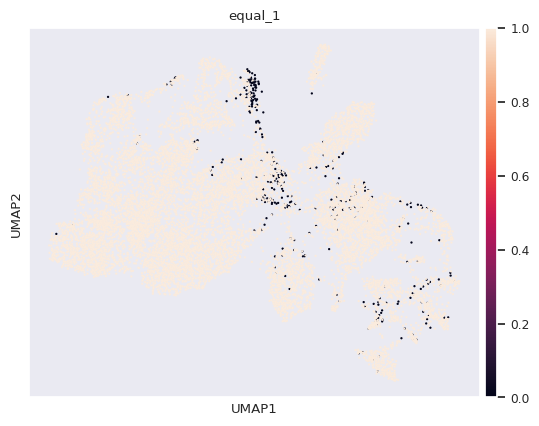

In [20]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1'])

Hepa          8.002
LSEC          7.833
Endo vein     7.250
Chol          6.000
Kupf         18.000
Stel         13.501
Fibr         16.125
B cell        4.500
Meso          5.000
Oth im        3.000
dtype: float64


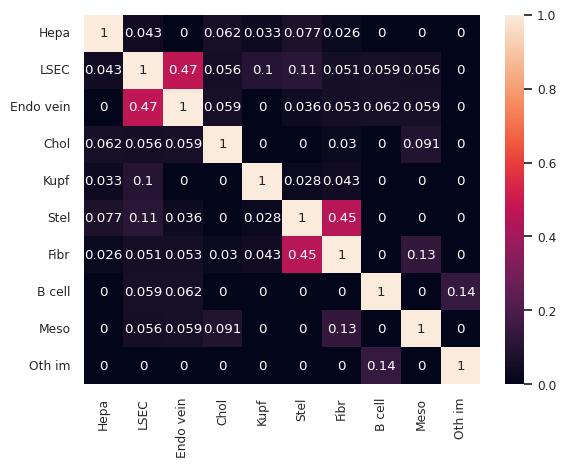

In [21]:
Jaccard_similarity_matrix(path_mg_mod1)

Cd36
Is marker gene of: []
Could also be a marker gene of: ['Endo vein']
Cd9
Is marker gene of: ['Endo vein', 'Chol', 'Oth im']
Could also be a marker gene of: ['Meso']
Clic5
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Meso']
Cyp2e1
Is marker gene of: []
Could also be a marker gene of: ['Kupf', 'Stel']
Dpt
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Flt4
Is marker gene of: ['LSEC']
Could also be a marker gene of: ['Meso']
Gdf15
Is marker gene of: []
Could also be a marker gene of: ['LSEC']
Ghr
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['LSEC']
Gls2
Is marker gene of: []
Could also be a marker gene of: ['LSEC']
Lyve1
Is marker gene of: ['LSEC']
Could also be a marker gene of: ['Meso']
Mmrn1
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Myh11
Is marker gene of: []
Could also be a marker gene of: ['Fibr']
Ngfr
Is marker gene of: []
Could also be a m

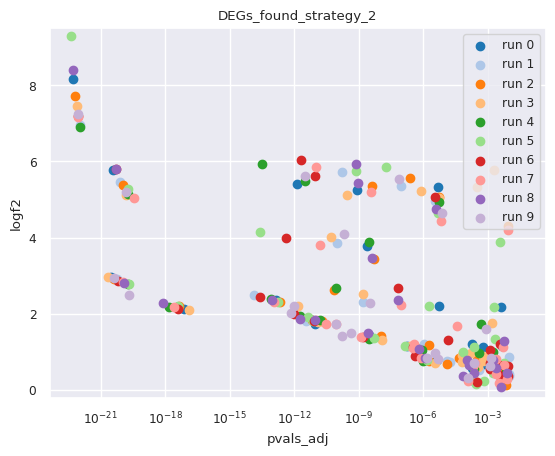

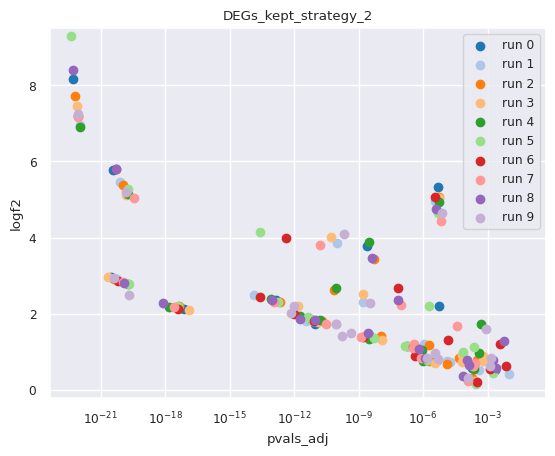

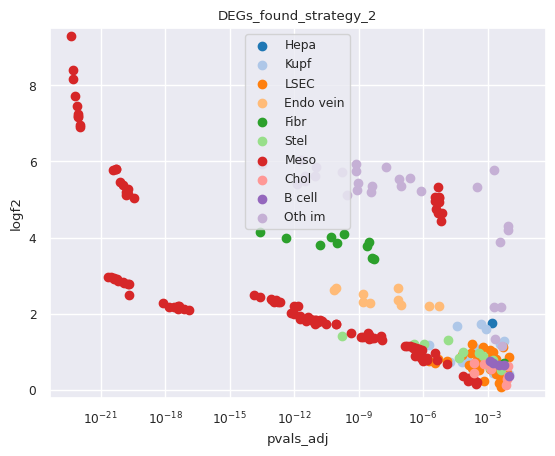

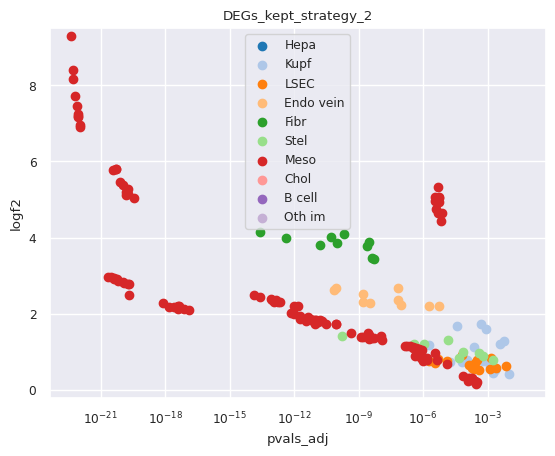

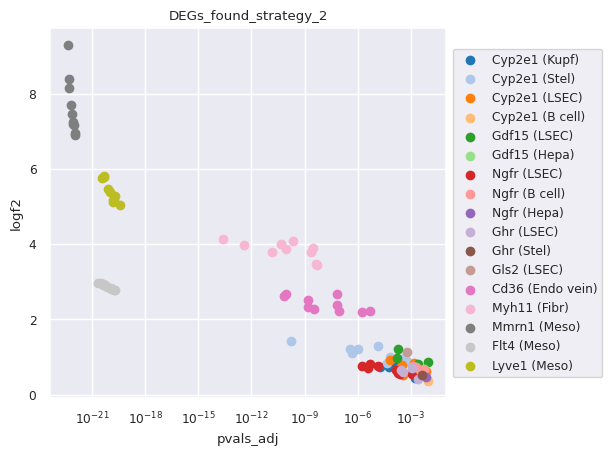

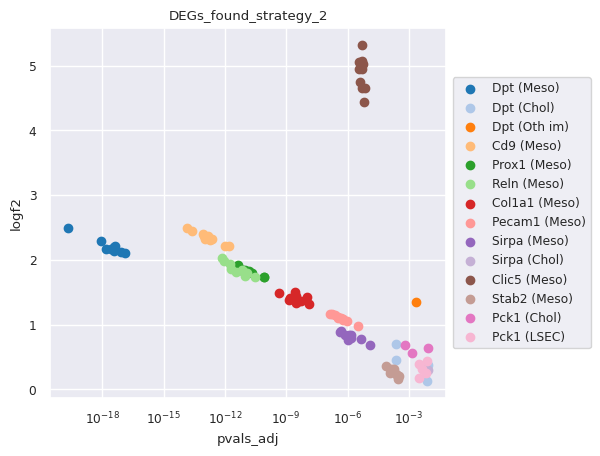

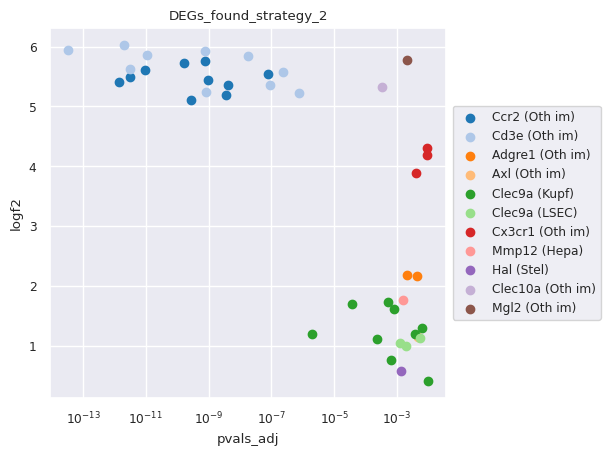

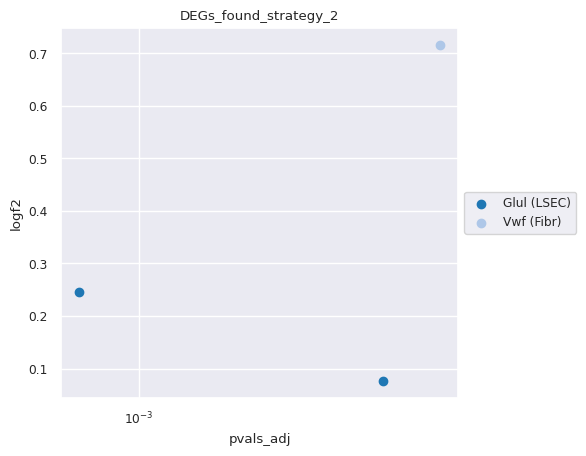

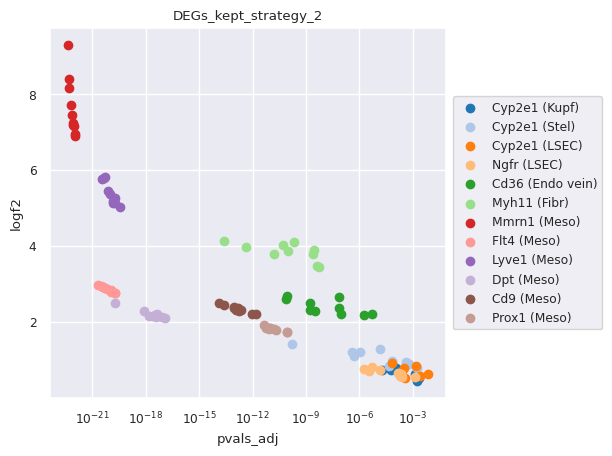

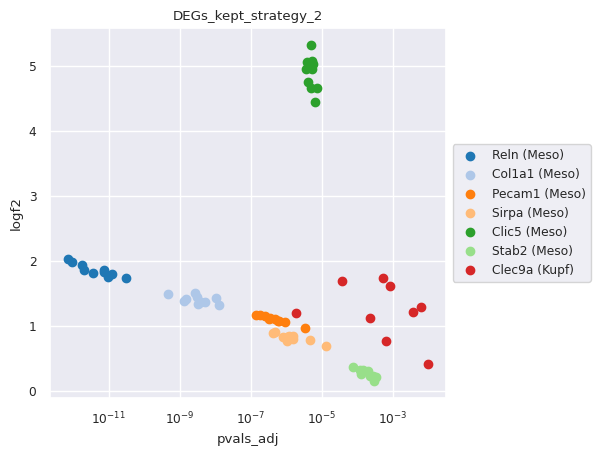

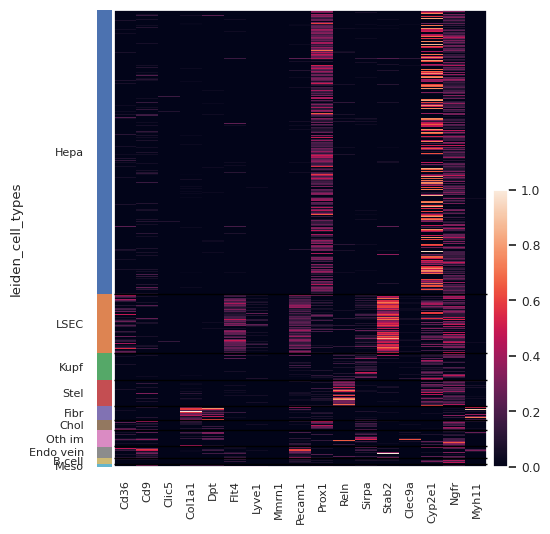

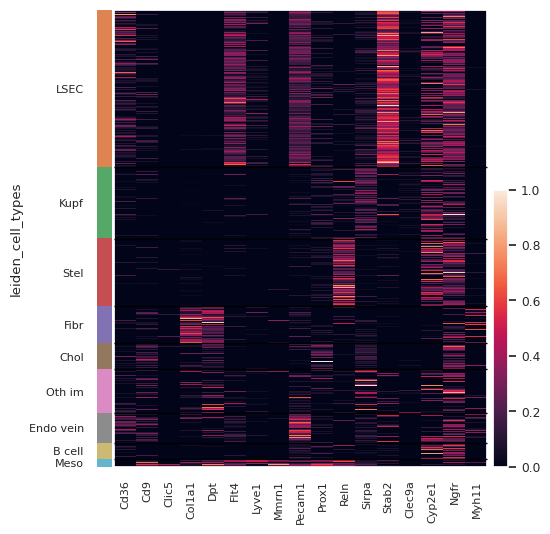

In [22]:
# STRATEGY 2 to change the marker gene list
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell','Oth im']
leiden_clusters = [[0,5,6,7,8,9,10,11,12,13,15,16,17,18,20,24,26],[3],[1,2,29],[22,27],[14],[4],[28],[19],[25],[21,23]]
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters,path_mg,10,min_cells_per_leiden_cell_type,2)

In [23]:
# Update marker gene list based on STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 0.5
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified2.csv")

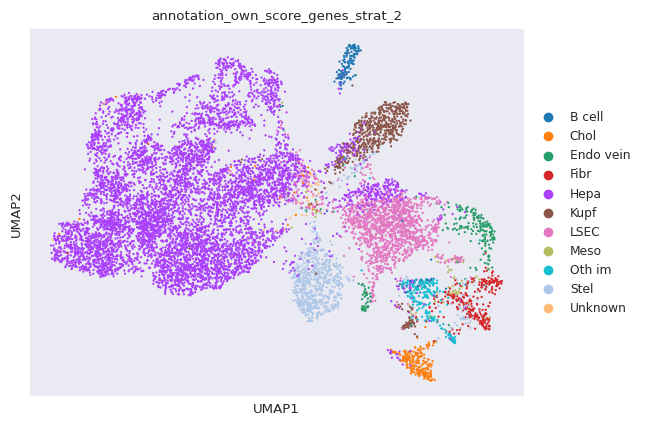

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_2
B cell                               1.531885
Chol                                 2.146420
Endo vein                            1.995012
Fibr                                 2.511578
Hepa                                64.098682
Kupf                                 5.423940
LSEC                                13.243677
Meso                                 0.623441
Oth im                               1.897043
Stel                                 6.278945
Unknown                              0.249377


In [24]:
# Own score genes with modified marker gene list based on STRATREGY 2
path_mg_mod2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified2.csv"
scores = own_score_genes(sdata,path_mg_mod2,suffix='_strat_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_2','umap_23_15',path_mg_mod2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

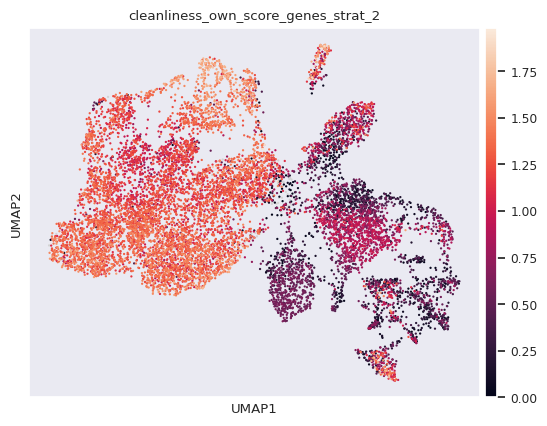

In [25]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_2'])
# makes sense that this becomes worse, because more marker genes overlap between cell types
# but does not mean that the annotation is worse

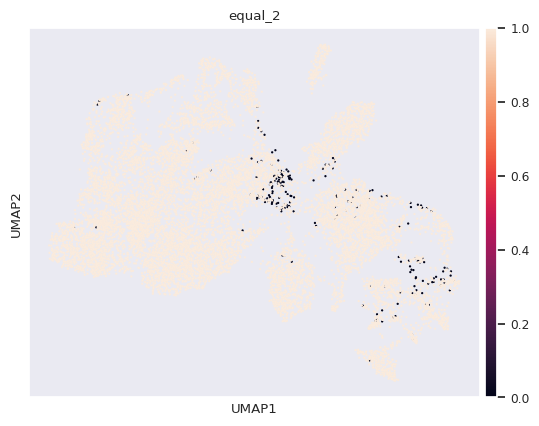

In [26]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_2'])

Hepa          8.669
LSEC         10.333
Endo vein     7.750
Chol          7.500
Kupf         20.500
Stel         16.501
Fibr         18.125
B cell        4.500
Meso         12.000
Oth im        4.000
dtype: float64


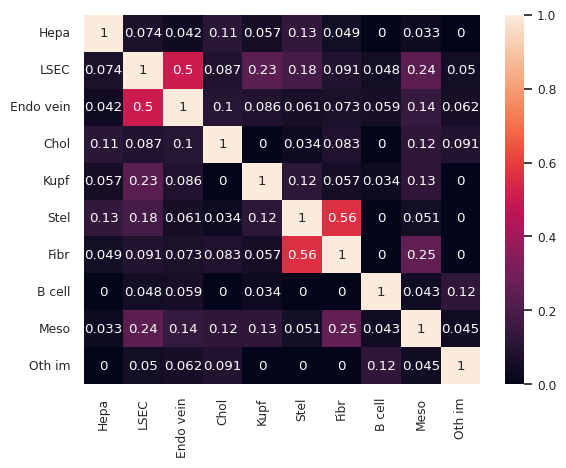

In [27]:
Jaccard_similarity_matrix(path_mg_mod2)

In [28]:
# STRATEGY 1 and STRATEGY 2 combined to change the marker gene list

In [29]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 0.5
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified_1_2.csv")

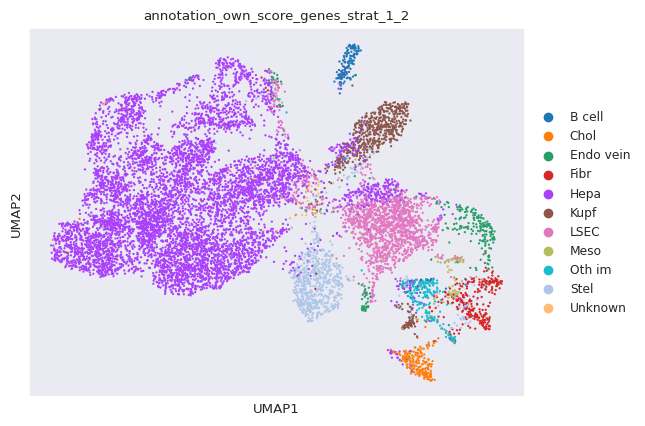

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1_2
B cell                                 1.540791
Chol                                   1.941575
Endo vein                              2.333452
Fibr                                   2.591735
Hepa                                  63.644460
Kupf                                   5.530816
LSEC                                  13.475240
Meso                                   0.961881
Oth im                                 1.790167
Stel                                   6.011756
Unknown                                0.178126


In [30]:
# Own score genes with modified marker gene list based on STRATREGY 1 and STRATEGY 2
path_mg_mod_1_2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_modified_1_2.csv"
scores = own_score_genes(sdata,path_mg_mod_1_2,suffix='_strat_1_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_1_2','umap_23_15',path_mg_mod_1_2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

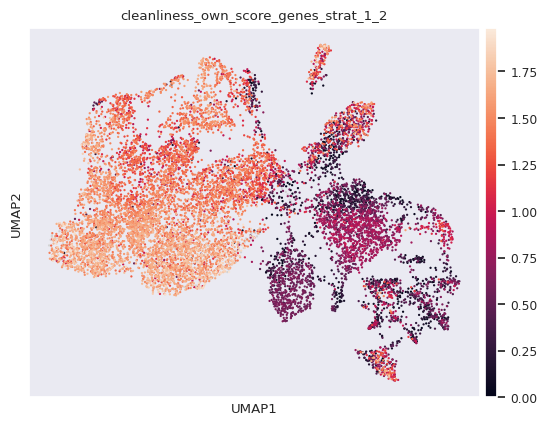

In [31]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1_2'])

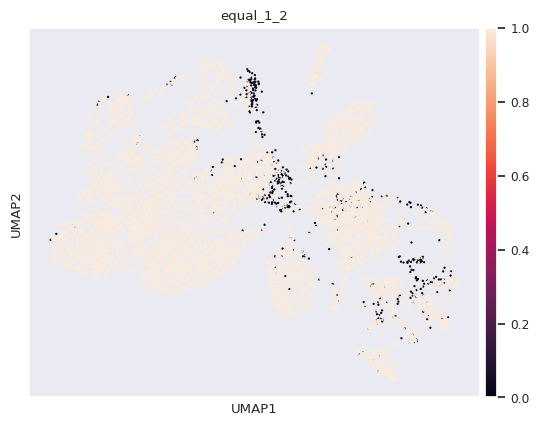

In [32]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

Hepa          8.002
LSEC          8.833
Endo vein     7.750
Chol          6.000
Kupf         19.000
Stel         14.001
Fibr         16.625
B cell        4.500
Meso         11.000
Oth im        3.000
dtype: float64


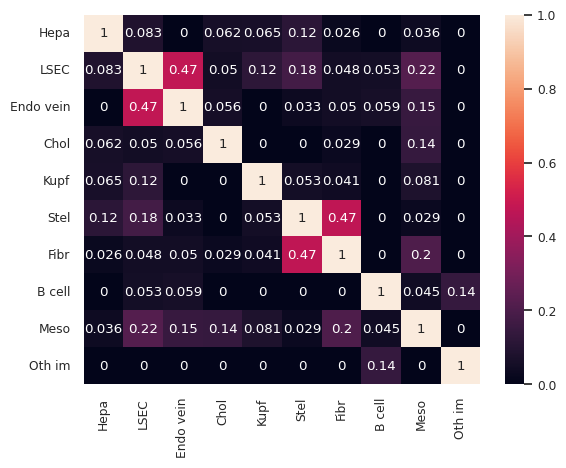

In [33]:
Jaccard_similarity_matrix(path_mg_mod_1_2)

In [34]:
sdata.table.obs

region  instance  n_genes_by_counts  log1p_n_genes_by_counts  \
cells                                                                
64         1         1                 12                 2.564949   
66         1         1                 16                 2.833213   
67         1         1                 15                 2.772589   
68         1         1                  8                 2.197225   
69         1         1                  6                 1.945910   
...      ...       ...                ...                      ...   
28929      1         1                  8                 2.197225   
28944      1         1                 11                 2.484907   
28992      1         1                 10                 2.397895   
29115      1         1                 16                 2.833213   
29130      1         1                 29                 3.401197   

       total_counts  log1p_total_counts  pct_counts_in_top_2_genes  \
cells                                                                
64              150            5.017280                  74.666667   
66               38            3.663562                  36.842105   
67               50            3.931826                  52.000000   
68               84            4.442651                  80.952381   
69               52            3.970292                  67.307692   
...             ...                 ...                        ...   
28929           108            4.691348                  87.037037   
28944           155            5.049856                  71.612903   
28992           132            4.890349                  71.969697   
29115            98            4.595120                  55.102041   
29130           168            5.129899                  36.309524   

       pct_counts_in_top_5_genes  n_counts  shapeSize  ...  \
cells                                                  ...   
64                     92.000000       150     2545.0  ...   
66                     68.421053        38     1257.0  ...   
67                     76.000000        50     3057.0  ...   
68                     95.238095        84     2071.0  ...   
69                     98.076923        52     1637.0  ...   
...                          ...       ...        ...  ...   
28929                  97.222222       108     2285.0  ...   
28944                  92.258065       155     1942.0  ...   
28992                  94.696970       132     3627.0  ...   
29115                  78.571429        98     3011.0  ...   
29130                  59.523810       168     3015.0  ...   

      annotation_own_score_genes_strat_2  \
cells                                      
64                                  Hepa   
66                                  Meso   
67                                  Meso   
68                                  Meso   
69                                  Hepa   
...                                  ...   
28929                               Hepa   
28944                               Hepa   
28992                               Hepa   
29115                               Stel   
29130                               Kupf   

       score_celltype_own_score_genes_strat_2  \
cells                                           
64                                   0.518377   
66                                   0.489093   
67                                   0.561515   
68                                   0.196323   
69                                   0.248247   
...                                       ...   
28929                                0.322433   
28944                                0.516080   
28992                                0.348373   
29115                                0.628982   
29130                                0.627606   

      second_score_celltype_own_score_genes_strat_2  \
cells                                                 
64                                         0.085765   
6